In [40]:
# Import necessaries librairies
import pandas as pd
import numpy as np
import tensorflow as tf
tf.__version__

import pathlib
import pandas as pd
import numpy as np
import os
import io
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score, classification_report
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPool1D, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy

In [2]:
data = pd.read_csv('https://storage.googleapis.com/jedha-projects/spam.csv', encoding = "latin-1", error_bad_lines=False)

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [5]:
# Basic stats
print("Number of rows : {}".format(data.shape[0]))
print()

print("Display of dataset: ")
display(data.head())
print()

print("Basics statistics: ")
data_desc = data.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])   # Calcul le & des valeurs manquantes de chaque colonne.V

Number of rows : 5572

Display of dataset: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



Basics statistics: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2



Percentage of missing values: 


v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

"We can observe that there are three columns with nearly 100% missing values, so we will proceed to drop them."

In [6]:

# Let's take the columns we're interested in
dataset = data[["v1", "v2"]]
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Renaming the columns
dataset.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [8]:
dataset.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## **Data Visualization**

In [9]:
dataset["target"].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

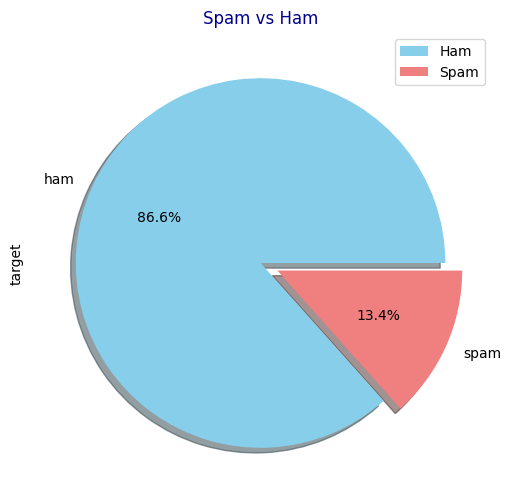

In [10]:
colors = ['skyblue', 'lightcoral']
explode = [0, 0.1]

dataset["target"].value_counts().plot(kind='pie', explode=explode, figsize=(6, 6), autopct='%1.1f%%', shadow=True, colors=colors)
plt.title("Spam vs Ham", color='darkblue')
plt.legend(["Ham", "Spam"], loc="upper right")
plt.show()

## **Text cleaning**

In [11]:
dataset["target"] = dataset["target"].apply(lambda x : 1 if x == "spam" else 0)

In [12]:
dataset["target"].head()

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int64

In [13]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Download model # English
!python -m spacy download en_core_web_md -q

2023-08-24 14:53:32.889759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 23.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [15]:
# Import English using en_core_web_sm.load()
import en_core_web_md
nlp = en_core_web_md.load()

In [16]:
# Import Stop words
from spacy.lang.en.stop_words import STOP_WORDS

Let's have a look at the STOP_WORDS

In [17]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

Now, let's clean the text.

In [18]:
# Removing double spaces
dataset["text_clean"] = dataset["text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" " or ch=="'"))
# removing trailing and leading spaces
dataset["text_clean"] = dataset["text"].apply(lambda x: x.replace(" +"," ").lower().strip())
# Retrieving the base form of each token and filtering out common words that may not add much meaning to the text
dataset["text_clean"] = dataset["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))

dataset

,target,text,text_clean
0,0,"Go until jurong point, crazy.. Available only ...","jurong point , crazy .. available bugis n grea..."
1,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun early hor ... u c ...
4,0,"Nah I don't think he goes to usf, he lives aro...","nah think usf , live"
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time try 2 contact u. u win å£750 pound pr...
5568,0,Will Ì_ b going to esplanade fr home?,ì _ b esplanade fr home ?
5569,0,"Pity, * was in mood for that. So...any other s...","pity , * mood . ... suggestion ?"
5570,0,The guy did some bitching but I acted like i'd...,guy bitching act like interested buy week free


In [19]:
# Checking for empty lines
mask = dataset.text_clean.apply(lambda x: x !="" or type(x) == str)
mask.value_counts()

True    5572
Name: text_clean, dtype: int64

## **Preprocessing**

In [20]:
# Let's tockenize the cleaned data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab")
tokenizer.fit_on_texts(dataset.text_clean)
dataset["text_encoded"] = tokenizer.texts_to_sequences(dataset.text_clean)

In [21]:
dataset.head()

,target,text,text_clean,text_encoded
0,0,"Go until jurong point, crazy.. Available only ...","jurong point , crazy .. available bugis n grea...","[1, 258, 476, 449, 1, 33, 57, 207, 1, 78, 1, 1..."
1,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...,"[9, 220, 477, 315, 2, 1]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[11, 323, 3, 567, 662, 31, 1, 914, 450, 1, 1, ..."
3,0,U dun say so early hor... U c already then say...,u dun early hor ... u c ...,"[2, 134, 166, 1, 2, 47]"
4,0,"Nah I don't think he goes to usf, he lives aro...","nah think usf , live","[767, 21, 706, 143]"


In [22]:
# Padding the encoded text
dataset_pad = tf.keras.preprocessing.sequence.pad_sequences(dataset.text_encoded, padding="post")

In [23]:
dataset_pad

array([[  1, 258, 476, ...,   0,   0,   0],
       [  9, 220, 477, ...,   0,   0,   0],
       [ 11, 323,   3, ...,   0,   0,   0],
       ...,
       [  1,   1,   1, ...,   0,   0,   0],
       [121,   1,   1, ...,   0,   0,   0],
       [  1, 322,   0, ...,   0,   0,   0]], dtype=int32)

In [24]:
dataset.shape

(5572, 4)

In [25]:
# Train Test Split
X_train, X_val, Y_train, Y_val = train_test_split(dataset_pad, dataset["target"], test_size=0.3, random_state=42, stratify=dataset["target"])

In [26]:
X_train

array([[  1,   1,   6, ...,   0,   0,   0],
       [ 13, 344, 902, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       ...,
       [108,   1,   1, ...,   0,   0,   0],
       [248, 405,   2, ...,   0,   0,   0],
       [  1, 133,   1, ...,   0,   0,   0]], dtype=int32)

In [27]:
train = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val = tf.data.Dataset.from_tensor_slices((X_val, Y_val))

In [28]:
# Building batches on training and validation datasets
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [29]:
 # Let's have a look at a batch
for sms, y in train_batch.take(1):
  print(sms, y)

tf.Tensor(
[[126  95 776 ...   0   0   0]
 [  8   7   0 ...   0   0   0]
 [  5   1   1 ...   0   0   0]
 ...
 [351   1   1 ...   0   0   0]
 [292   1   1 ...   0   0   0]
 [ 17   4   1 ...   0   0   0]], shape=(64, 77), dtype=int32) tf.Tensor(
[1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0], shape=(64,), dtype=int64)


## **Model**

In [30]:
# Let's build the model architecture
vocab_size = tokenizer.num_words
embedding_dim = 128
model = Sequential([
                  # Input layer Word Embedding
                  Embedding(vocab_size+1, embedding_dim, name="embedding"),

                  # Gobal average pooling
                  GlobalAveragePooling1D(),

                  # Dense layers
                  Dense(64, activation='relu'),
                  Dense(32, activation='relu'),

                  # Output layer with the number of output neurons equal to the number of classes using the softmax function
                  Dense(1, activation="sigmoid")
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         128128    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 138,497
Trainable params: 138,497
Non-trainable params: 0
__________________________________________________

In [32]:
# Now, let's compile the model
optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

In [33]:
# Calcultaing weight since the dataset is unbalanced with much more 0 (ham) than 1 (spam)
weights = 1/(dataset["target"]).value_counts()
weights = weights * len(dataset)/5
weights = {index : values for index , values in zip(weights.index,weights.values)}
weights

{0: 0.23096373056994818, 1: 1.491834002677376}

In [34]:
# Training the model
history = model.fit(train_batch,
                    epochs=20,
                    validation_data=val_batch,
                    class_weight=weights)

Epoch 1/20
61/61 [==============================] - 1s 7ms/step - loss: 0.2709 - accuracy: 0.8641 - val_loss: 0.5765 - val_accuracy: 0.9043
Epoch 2/20
61/61 [==============================] - 0s 5ms/step - loss: 0.1850 - accuracy: 0.9413 - val_loss: 0.2050 - val_accuracy: 0.9438
Epoch 3/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0728 - accuracy: 0.9513 - val_loss: 0.1520 - val_accuracy: 0.9539
Epoch 4/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0460 - accuracy: 0.9751 - val_loss: 0.1069 - val_accuracy: 0.9737
Epoch 5/20
61/61 [==============================] - 0s 5ms/step - loss: 0.0306 - accuracy: 0.9844 - val_loss: 0.0728 - val_accuracy: 0.9803
Epoch 6/20
61/61 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9879 - val_loss: 0.0623 - val_accuracy: 0.9844
Epoch 7/20
61/61 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9895 - val_loss: 0.1161 - val_accuracy: 0.9629
Epoch 8/20
61/61 [==

## **Performance evaluation**

In [35]:
X_val

array([[498,   2, 841, ...,   0,   0,   0],
       [ 10,   1, 360, ...,   0,   0,   0],
       [ 62, 101,  28, ...,   0,   0,   0],
       ...,
       [  4,   3,   1, ...,   0,   0,   0],
       [376, 374,  85, ...,   0,   0,   0],
       [824,   1,   1, ...,   0,   0,   0]], dtype=int32)

In [36]:
Y_predict = [1 if o>0.5 else 0 for o in model.predict(X_val)]

53/53 [==============================] - 0s 1ms/step


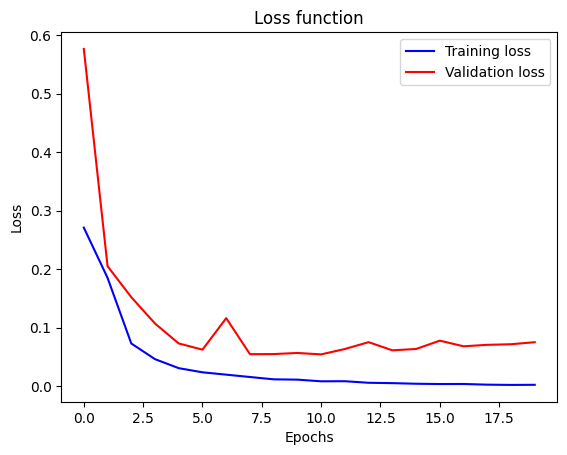

In [37]:
# Visualization of the training process on the loss function
plt.plot(history.history["loss"], color="b", label="Training loss")
plt.plot(history.history["val_loss"], color="r", label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Loss function")
plt.legend()
plt.show()

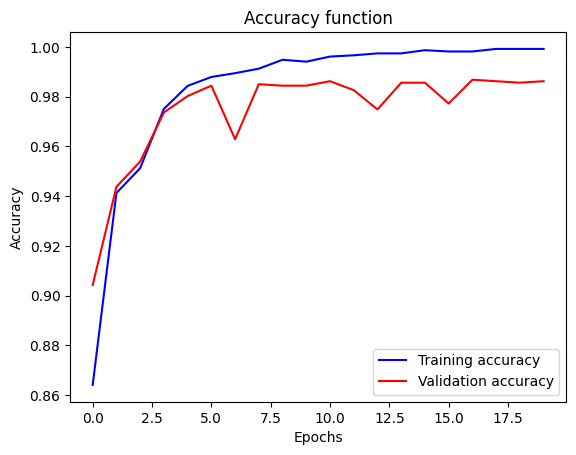

In [38]:
# Visualization of the training process on the metric function
plt.plot(history.history["accuracy"], color="b", label="Training accuracy")
plt.plot(history.history["val_accuracy"], color="r", label="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.title("Accuracy function")
plt.legend()
plt.show()

In [41]:

# Checking all results
prediction = model.predict(X_val)
classes_pred = [round(pred[0]) for pred in prediction]

print(classification_report(Y_val, classes_pred))

53/53 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.97      0.92      0.95       224

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [42]:
cf_matrix =confusion_matrix(Y_val,Y_predict)
tn, fp, fn, tp = confusion_matrix(Y_val,Y_predict).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(Y_val, Y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(Y_val, Y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(Y_val,Y_predict)))

Precision: 97.18%
Recall: 92.41%
F1 Score: 94.74%


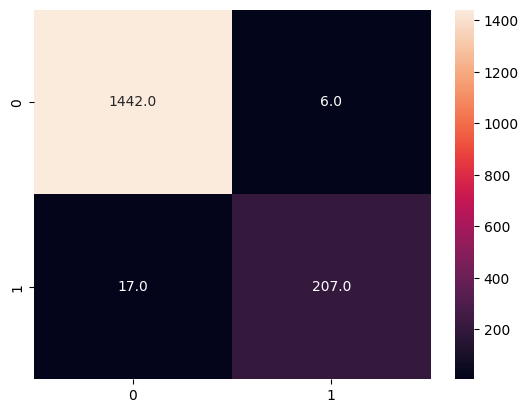

In [43]:

# Visualizing True Positives, True Negatives, False Positives, False Negatives with a confusion matrix
confusion_matrix = confusion_matrix(Y_val, classes_pred)

sns.heatmap(confusion_matrix, annot = True, fmt=".1f")
plt.show()

## **Conclusion**


As observed, our model demonstrates a commendable prediction accuracy for identifying spam messages, correctly flagging 207 out of 224 instances (92.41%). Additionally, its impact on misclassifying legitimate/ham messages is limited, with only 2 out of 962 being falsely identified as spam.